In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
data = pd.read_csv('/content/ndata.xls')

# Display the first few rows of the dataset
print(data.head())

       Time  Radiation  Temperature  Pressure  Humidity  \
0  23:55:26       1.21           48     30.46        59   
1  23:50:23       1.21           48     30.46        58   
2  23:45:26       1.23           48     30.46        57   
3  23:40:21       1.21           48     30.46        60   
4  23:35:24       1.17           48     30.46        62   

   WindDirection(Degrees)  Speed  
0                  177.39   5.62  
1                  176.78   3.37  
2                  158.75   3.37  
3                  137.71   3.37  
4                  104.95   5.62  


In [ ]:
# Check for missing values
print(data.isnull().sum())

Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
dtype: int64


<Axes: >

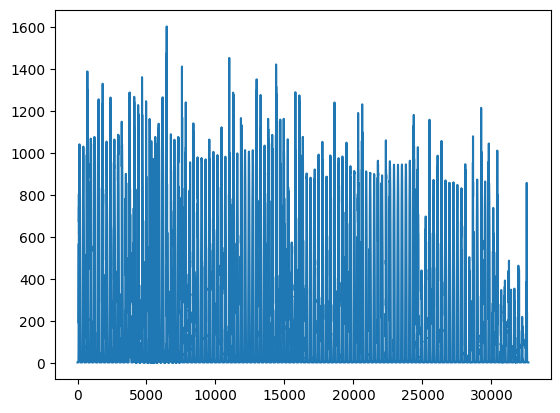

In [ ]:
data['Radiation'].plot()

Radiation: Target column (solar radiation)

Temperature: Temperature (°C)

Pressure: Atmospheric pressure (hPa)

Humidity: Humidity percentage (%)

WindDirection: Wind direction in degrees

Windspeed: Wind speed (m/s)¶

In [ ]:
# Convert 'time' column into a numeric feature (if it's in datetime format)
# Optionally, you can extract year, month, day, hour, etc., from the time column
data['Time'] = pd.to_datetime(data['Time'])
data['hour'] = data['Time'].dt.hour

# Drop the original 'time' column as it's now converted into numerical features
data.drop(columns=['Time'], inplace=True)

# Handle missing data
data.dropna(inplace=True)  # Or fill missing values with mean, median, etc.

# Show the final processed data
print(data.head())


<ipython-input-12-dae13cb44151>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


   Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   hour  
0    23  
1    23  
2    23  
3    23  
4    23  


In [ ]:
# Define the features (X) and target (y)
X = data.drop('Radiation', axis=1)  # All columns except 'radiation'
y = data['Radiation']  # The target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [ ]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Hyperparameter Tuning with GridSearchCV

In [ ]:
# Define hyperparameters grid for Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum samples required to be at a leaf node
    'bootstrap': [True, False]         # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Use the best model from grid search
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Evaluating the model

In [ ]:
# Predict on the test data
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2 Score): {r2:.2f}')

Mean Squared Error (MSE): 10137.79
Root Mean Squared Error (RMSE): 100.69
R-squared (R2 Score): 0.90


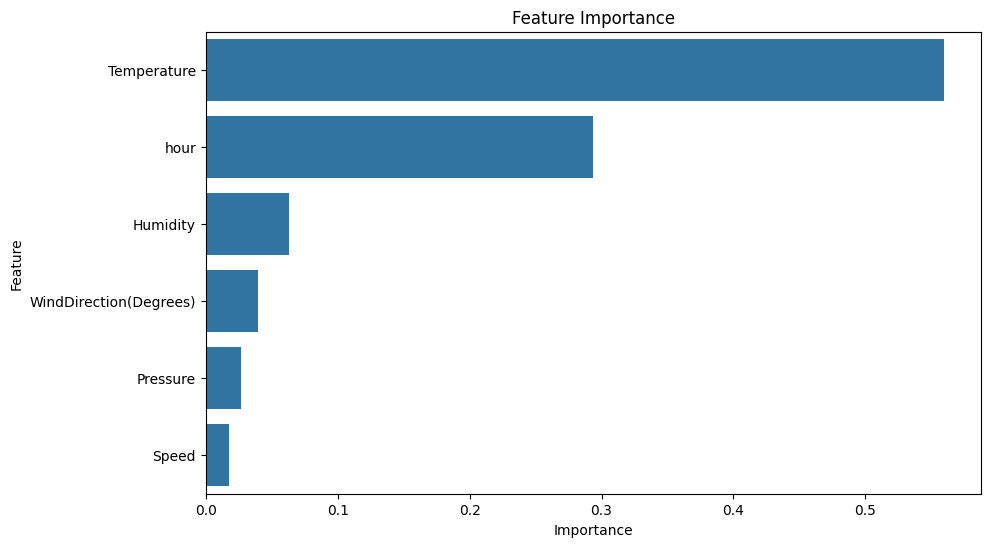

In [ ]:
# Plot the feature importances
feature_importances = best_rf_model.feature_importances_
features = X.columns

# Create a DataFrame to visualize feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [ ]:
import pickle

# Replace `model` with your trained model variable
with open('mode.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

print("Model saved successfully.")

Model saved successfully.


In [ ]:
import pandas as pd

# Assuming 'best_rf_model' is your trained model

def predict_radiation():
    print("Please enter the following values:")

    # Taking user input for all features, including hour
    try:
        temperature = float(input("Enter the temperature (in Celsius): "))
        pressure = float(input("Enter the pressure (in hPa): "))
        humidity = float(input("Enter the humidity (in %): "))
        wind_direction = float(input("Enter the wind direction (in degrees): "))
        wind_speed = float(input("Enter the wind speed (in m/s): "))
        hour = float(input("Enter the hour of the day (0-23): "))
    except ValueError:
        print("Invalid input. Please enter numeric values where required.")
        return

    # Creating a DataFrame from the user input
    user_input = pd.DataFrame({
        'Temperature': [temperature],
        'Pressure': [pressure],
        'Humidity': [humidity],
        'WindDirection(Degrees)': [wind_direction],
        'Speed': [wind_speed],
        'hour': [hour]
    })

    # Predict the solar radiation using the trained model
    prediction = best_rf_model.predict(user_input)
    print(f"Predicted Solar Radiation: {prediction[0]:.2f} W/m²")

# Call the function to take user input and predict solar radiation
predict_radiation()


Please enter the following values:
Enter the temperature (in Celsius): 48
Enter the pressure (in hPa): 30
Enter the humidity (in %): 59
Enter the wind direction (in degrees): 177
Enter the wind speed (in m/s): 5
Enter the hour of the day (0-23): 23
Predicted Solar Radiation: 1.41 W/m²
